### LOADING DATA - COLAB

In [30]:
"""
import pandas as pd
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"""

'\nimport pandas as pd\nimport kagglehub\nimport os\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n'

In [31]:
"""
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# List files in the downloaded directory
print(os.listdir(path))
"""

'\npath = kagglehub.dataset_download("blastchar/telco-customer-churn")\n\n# List files in the downloaded directory\nprint(os.listdir(path))\n'

In [32]:
# df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

### LOADING DATA - LOCAL

In [33]:
# pip install seaborn matplotlib pandas numpy

import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
file_path = os.path.join('..', '..', 'data', 'raw', 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

if os.path.exists(file_path):
    print(f"Loading data locally from: {file_path}")
    df = pd.read_csv(file_path)
else:
    print(f"[ISSUE]: File not found at {file_path}")
    print(f"Current Working Directory is: {os.getcwd()}")

Loading data locally from: ..\..\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv


### CONTD.

In [35]:
# first 5 rows of the dataframe to check
# df.head(2)
# head alone, hides the middles columns

pd.set_option('display.max_columns', None)
display(df.head(3))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [36]:
df.shape

(7043, 21)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# Adds a background gradient to numerical columns
display(df.head(10).style.background_gradient(cmap='Blues'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.100000,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800000,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150000,3487.95,No


In [39]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


TotalCharges, even though it's a number... seems to be a text.

In [40]:
# make TotalCharges numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### HANDLING MISSING VALUES

In [41]:
# checking missing values now
print("Missing values AFTER coercion:", df['TotalCharges'].isnull().sum())

Missing values AFTER coercion: 11


In [42]:
# check how many null values we have
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [43]:
# viewing the rows with missing TotalCharges
null_rows = df[df['TotalCharges'].isnull()].index

print("Row numbers with missing TotalCharges:")
print(null_rows.tolist())

print("\nInspecting the rows:")
display(df.loc[null_rows])

Row numbers with missing TotalCharges:
[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

Inspecting the rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The tenure is 0 in these rows. Meaning that the customers are new. Thus, no total charges makes sense.

In [44]:
# replacing NaN with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# verify the fix
print("Remaining missing values:", df['TotalCharges'].isnull().sum())

Remaining missing values: 0


### TARGET VARIABLE ANALYSIS (Churn for Class Imbalance)

Goal: Checking if the dataset is balanced or imbalanced

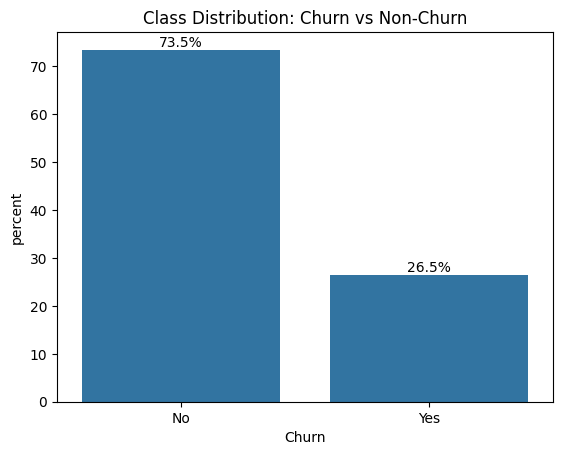

In [45]:
ax = sns.countplot(x='Churn', data=df, stat='percent')

ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Class Distribution: Churn vs Non-Churn')
plt.show()

#Take the only bar container in the chart, and automatically add labels above each bar, formatted as percentages.

Observation:

The dataset is imbalanced. Only 26.5% of customers churned.<br>
This means we should focus on F1-Score or ROC-AUC metrics later, as Accuracy alone might be misleading.

### NUMERICAL ANALYSIS (Tenure & Charges)

Goal: See when people leave

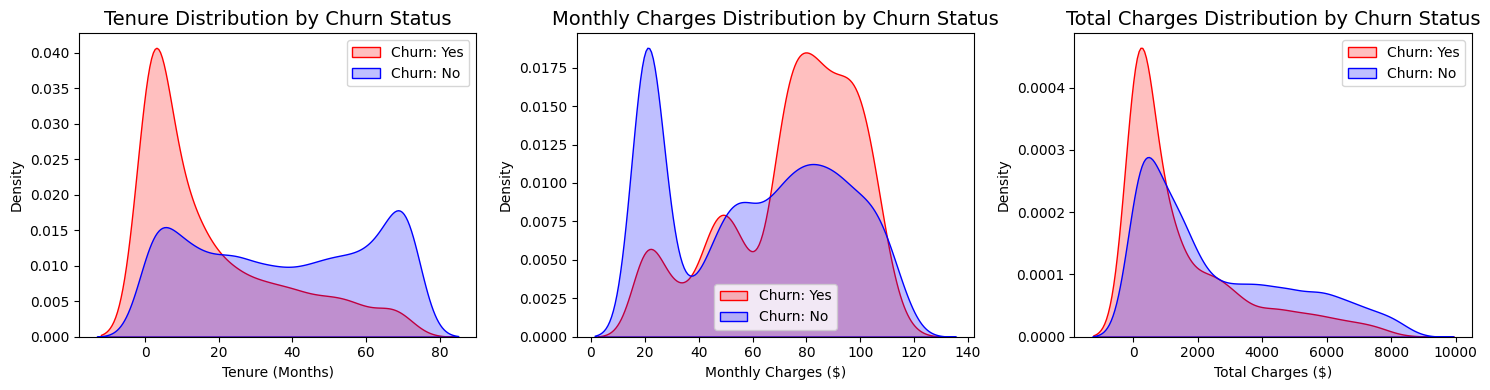

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Tenure
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], fill=True, color='red', label='Churn: Yes', ax=ax1)
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], fill=True, color='blue', label='Churn: No', ax=ax1)
ax1.set_title('Tenure Distribution by Churn Status', fontsize=14)
ax1.set_xlabel('Tenure (Months)')
ax1.legend()

# Plot 2: Monthly Charges
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], fill=True, color='red', label='Churn: Yes', ax=ax2)
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], fill=True, color='blue', label='Churn: No', ax=ax2)
ax2.set_title('Monthly Charges Distribution by Churn Status', fontsize=14)
ax2.set_xlabel('Monthly Charges ($)')
ax2.legend()

# Plot 3: Total Charges
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], fill=True, color='red', label='Churn: Yes', ax=ax3)
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], fill=True, color='blue', label='Churn: No', ax=ax3)
ax3.set_title('Total Charges Distribution by Churn Status', fontsize=14)
ax3.set_xlabel('Total Charges ($)')
ax3.legend()

plt.tight_layout()
plt.show()

Insights:

1. Tenure: There is a massive spike in churn for new customers (0-5 months). Long-term customers stay.
2. Charges: Higher monthly charges correlate with higher churn (red peak is further right).

### CATEGORICAL ANALYSIS (The "Why")

Goal: See who leaves (e.g., "Do fiber optic users hate us?").

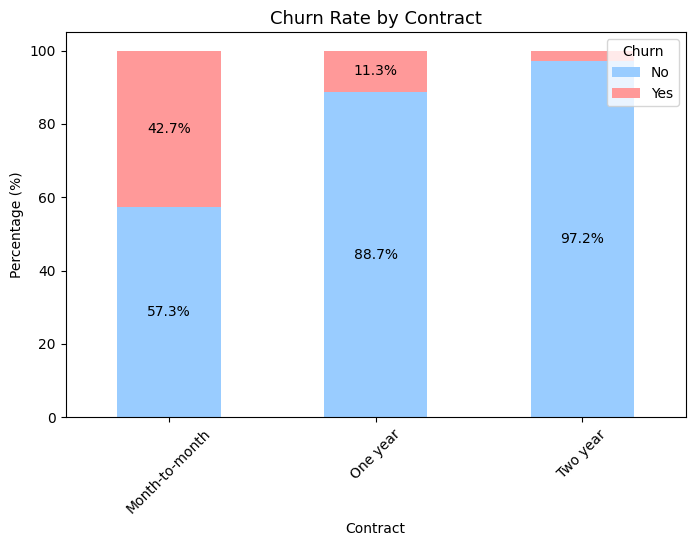

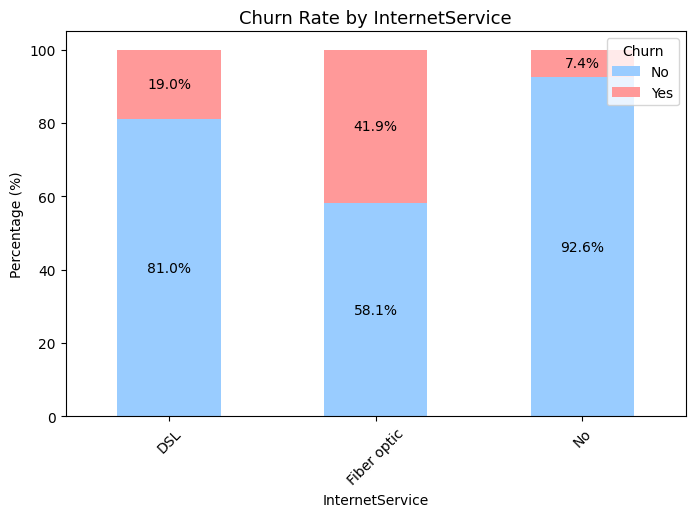

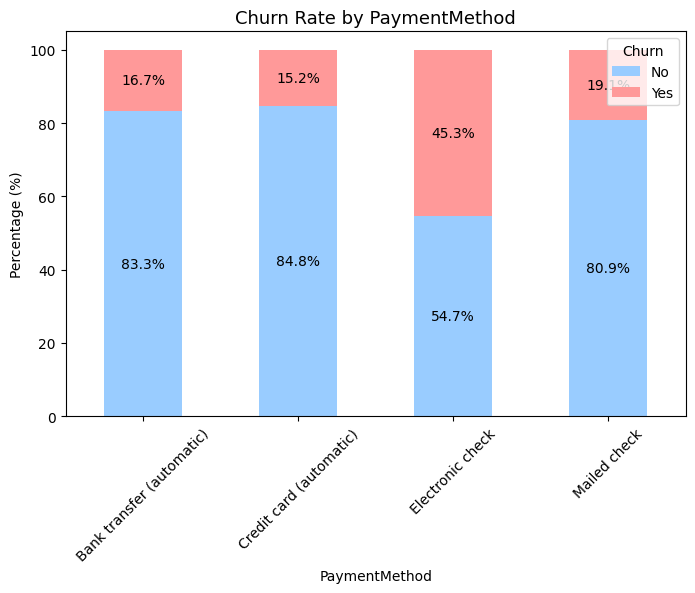

In [47]:
def plot_categorical_churn(feature):
    temp = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    ax = temp.plot(kind='bar', 
                   stacked=True, 
                   figsize=(8, 5), 
                   color=['#99ccff', '#ff9999'])  # light blue, light red

    plt.title(f'Churn Rate by {feature}', fontsize=13)
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=45)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 5:
            ax.text(x + width / 2, y + height / 2,
                    '{:.1f}%'.format(height),
                    ha='center', va='center',
                    color='black')  # black text looks cleaner

    plt.show()


# Running the function for key features
features_to_check = ['Contract', 'InternetService', 'PaymentMethod']

for f in features_to_check:
    plot_categorical_churn(f)

Key Insights: 
1. Contract: Month-to-month contracts have a massive churn rate (~42%) compared to 2-year contracts.
2. Internet: Fiber Optic users churn much more than DSL users (likely due to price or service issues).
3. Payment: Electronic Check users are the highest churn group among payment methods.

### CORRELATION ANALYSIS

Goal: See which variables move together.

We need to see which numbers correlate with Churn. Since Churn is text ("Yes"/"No"), we temporarily convert it to numbers (1/0) just for this plot so it appears in the math.

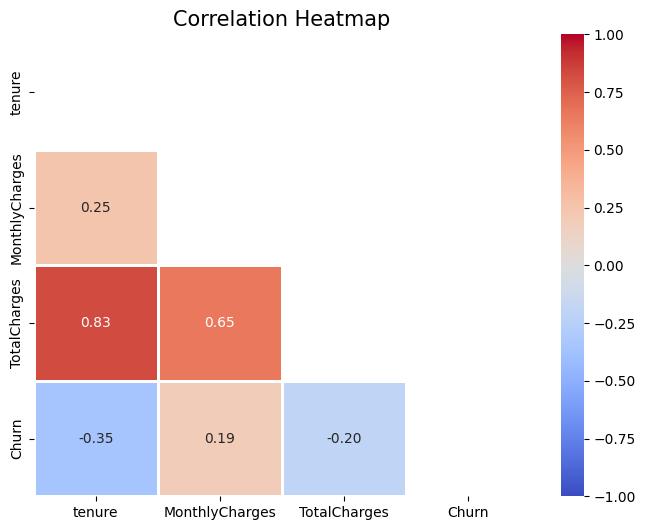

In [48]:
# Create a copy to avoid messing up the original dataframe
df_corr = df.copy()

# Encode Churn to numeric (1/0) so it appears in the correlation matrix
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns for correlation
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df_corr[numerical_cols].corr()

# Plot
plt.figure(figsize=(8, 6))

# Use a mask to hide the upper triangle (it's a mirror image, hiding it looks cleaner/pro)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

Insights: 
1. 'Churn' has a negative correlation with 'tenure' (-0.35), confirming that loyal customers stay.
2. 'MonthlyCharges' has a positive correlation (0.19), suggesting higher prices drive churn."